In [31]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

pd.set_option('max_columns',100)
%matplotlib inline
plt.rcParams['figure.figsize'] = (30,30)

In [6]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_train.head()
df_train.shape

(1460, 81)

In [7]:
y_train = df_train['SalePrice']
X_train = df_train.drop(['SalePrice','Id'], axis=1)
X_test = df_test.drop(['Id'], axis=1)


In [8]:
print(X_train.shape)
print(X_test.shape)
all_data = pd.concat([X_train, X_test], ignore_index=True)
all_data.shape

(1460, 79)
(1459, 79)


(2919, 79)

In [9]:
all_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [10]:
one_hot_df = pd.get_dummies(all_data, drop_first=True, dummy_na=True)
one_hot_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_nan,Street_Pave,Street_nan,Alley_Pave,Alley_nan,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotShape_nan,LandContour_HLS,...,FireplaceQu_TA,FireplaceQu_nan,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_nan,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_nan,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_nan,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,GarageCond_nan,PavedDrive_P,PavedDrive_Y,PavedDrive_nan,PoolQC_Fa,PoolQC_Gd,PoolQC_nan,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_nan,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_nan,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleType_nan,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008,0,0,1,0,0,1,0,0,1,0,0,1,0,0,...,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007,0,0,1,0,0,1,0,0,1,0,0,1,0,0,...,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,9,2008,0,0,1,0,0,1,0,0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,2,2006,0,0,1,0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,12,2008,0,0,1,0,0,1,0,0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [11]:
nulls = pd.DataFrame(df_train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls

,Null Count
Feature,
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageCond,81
GarageType,81
GarageYrBlt,81


In [12]:
predict_vars1 = ['LotArea','GrLivArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','FullBath',\
                 'HalfBath','BedroomAbvGr','KitchenAbvGr','GarageCars','MoSold','YrSold',\
                 'Neighborhood','KitchenQual','ExterQual']

In [13]:
df1 = df_train[predict_vars1]

In [14]:
df1.isnull().any()  # No NA's in dataframe

LotArea         False
GrLivArea       False
OverallQual     False
OverallCond     False
YearBuilt       False
YearRemodAdd    False
FullBath        False
HalfBath        False
BedroomAbvGr    False
KitchenAbvGr    False
GarageCars      False
MoSold          False
YrSold          False
Neighborhood    False
KitchenQual     False
ExterQual       False
dtype: bool

(array([ 220.,   72.,   84.,  106.,   98.,   48.,   64.,  150.,  241.,  377.]),
 array([ 1950.,  1956.,  1962.,  1968.,  1974.,  1980.,  1986.,  1992.,
         1998.,  2004.,  2010.]),
 <a list of 10 Patch objects>)

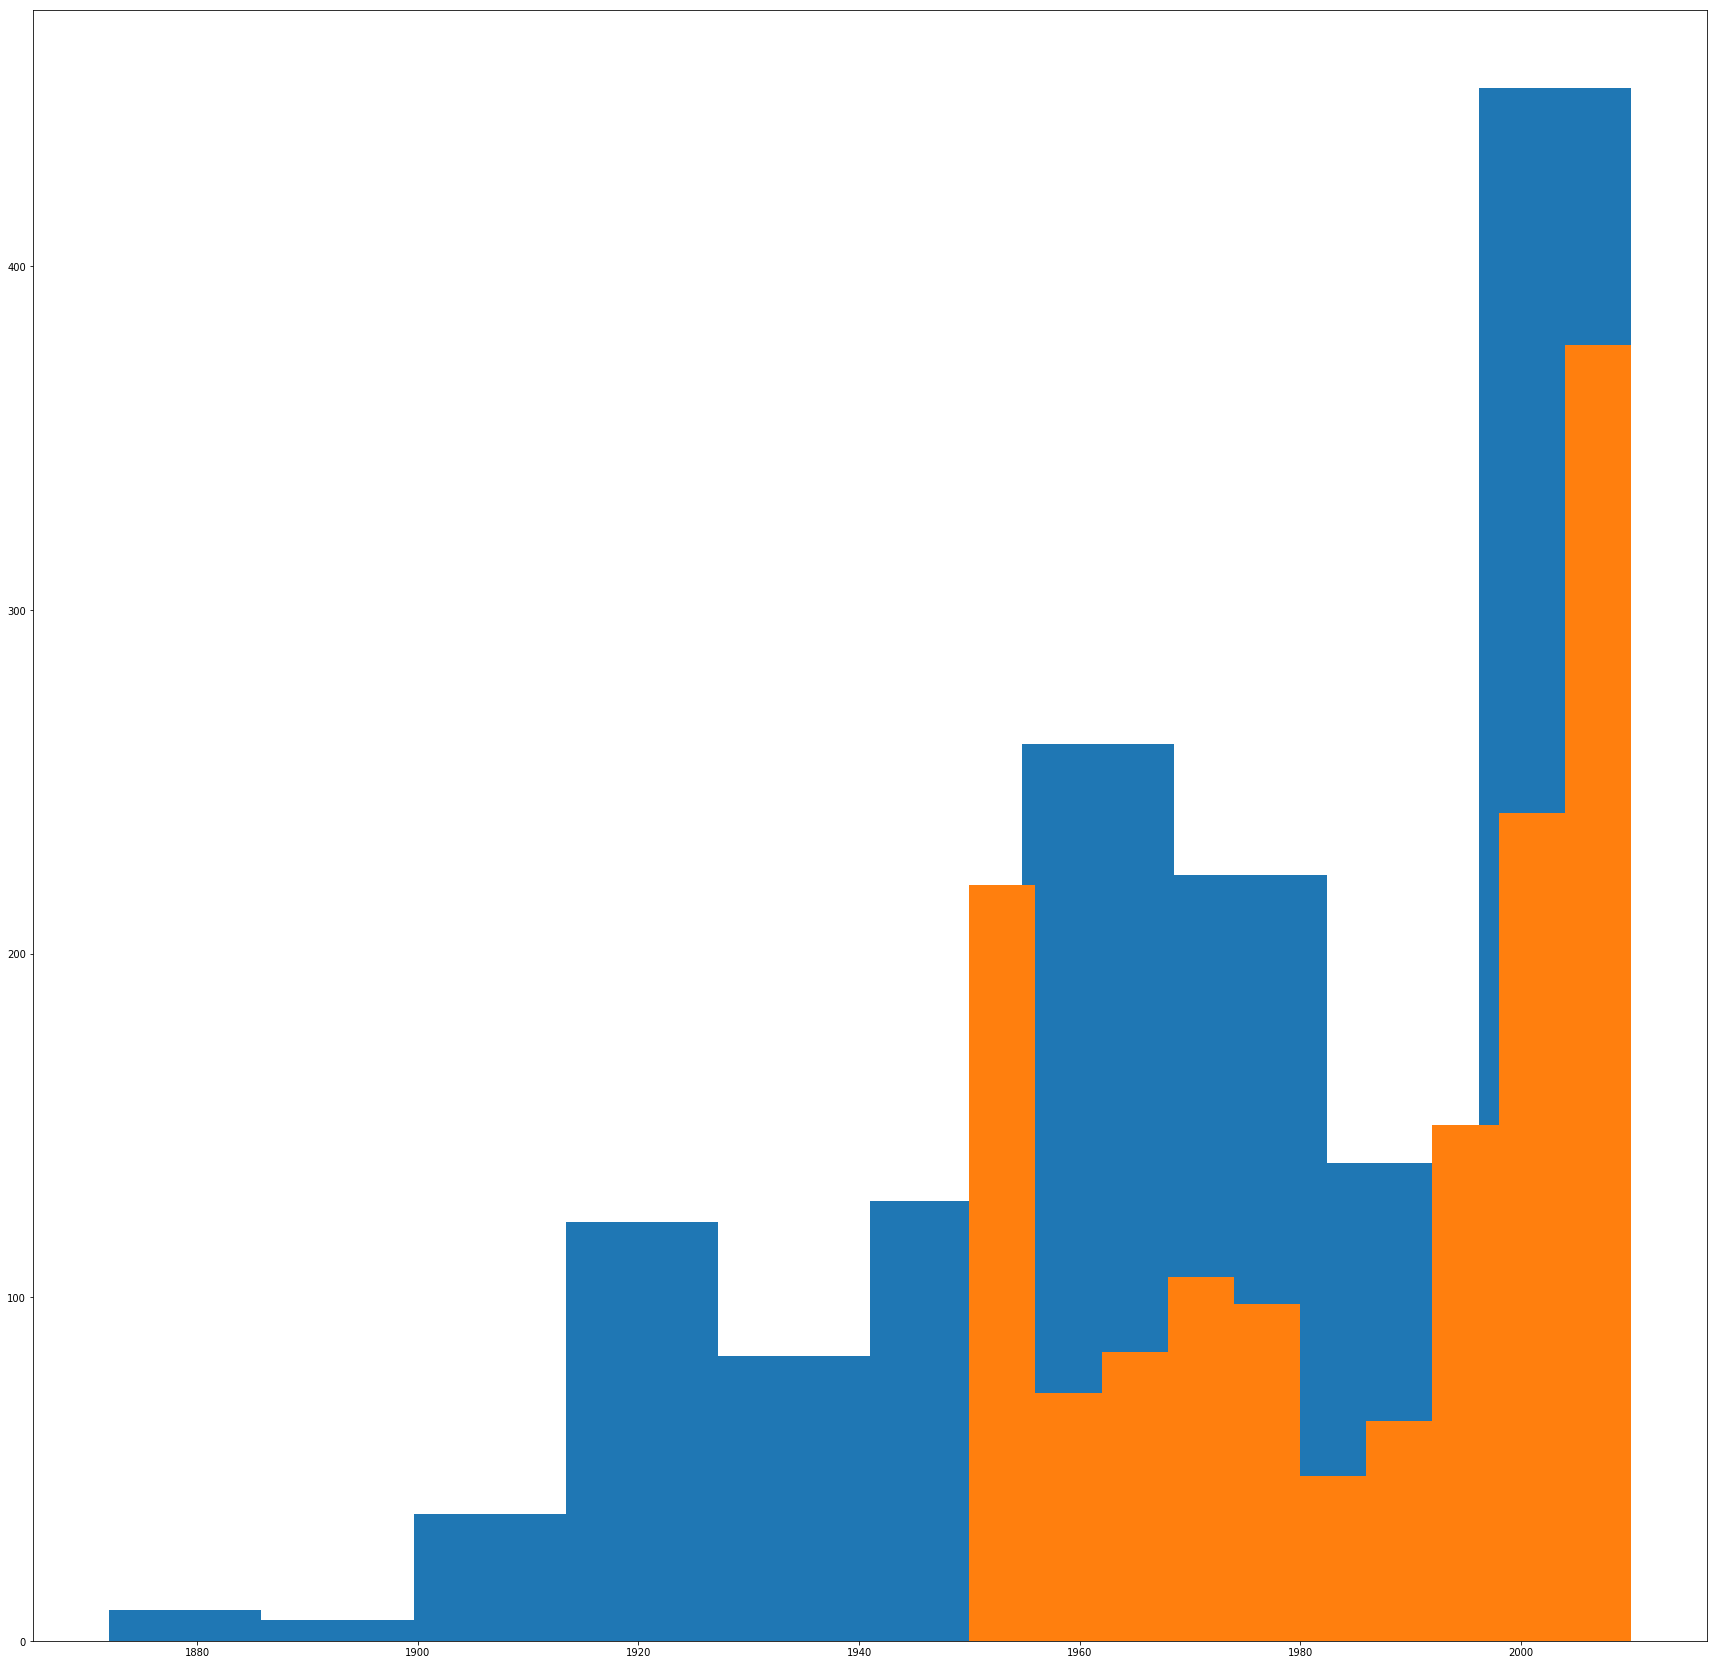

In [15]:
plt.hist(df1['YearBuilt'])
plt.hist(df1['YearRemodAdd'])

In [16]:
# 1 - check for NA's in columns of interest; impute?  X
 #1.2 ? create training & test sets within df_trial data  
# 2 - set-up linear regresion
# 3 - set-up regression tree
# 4 - cross-validate models ???


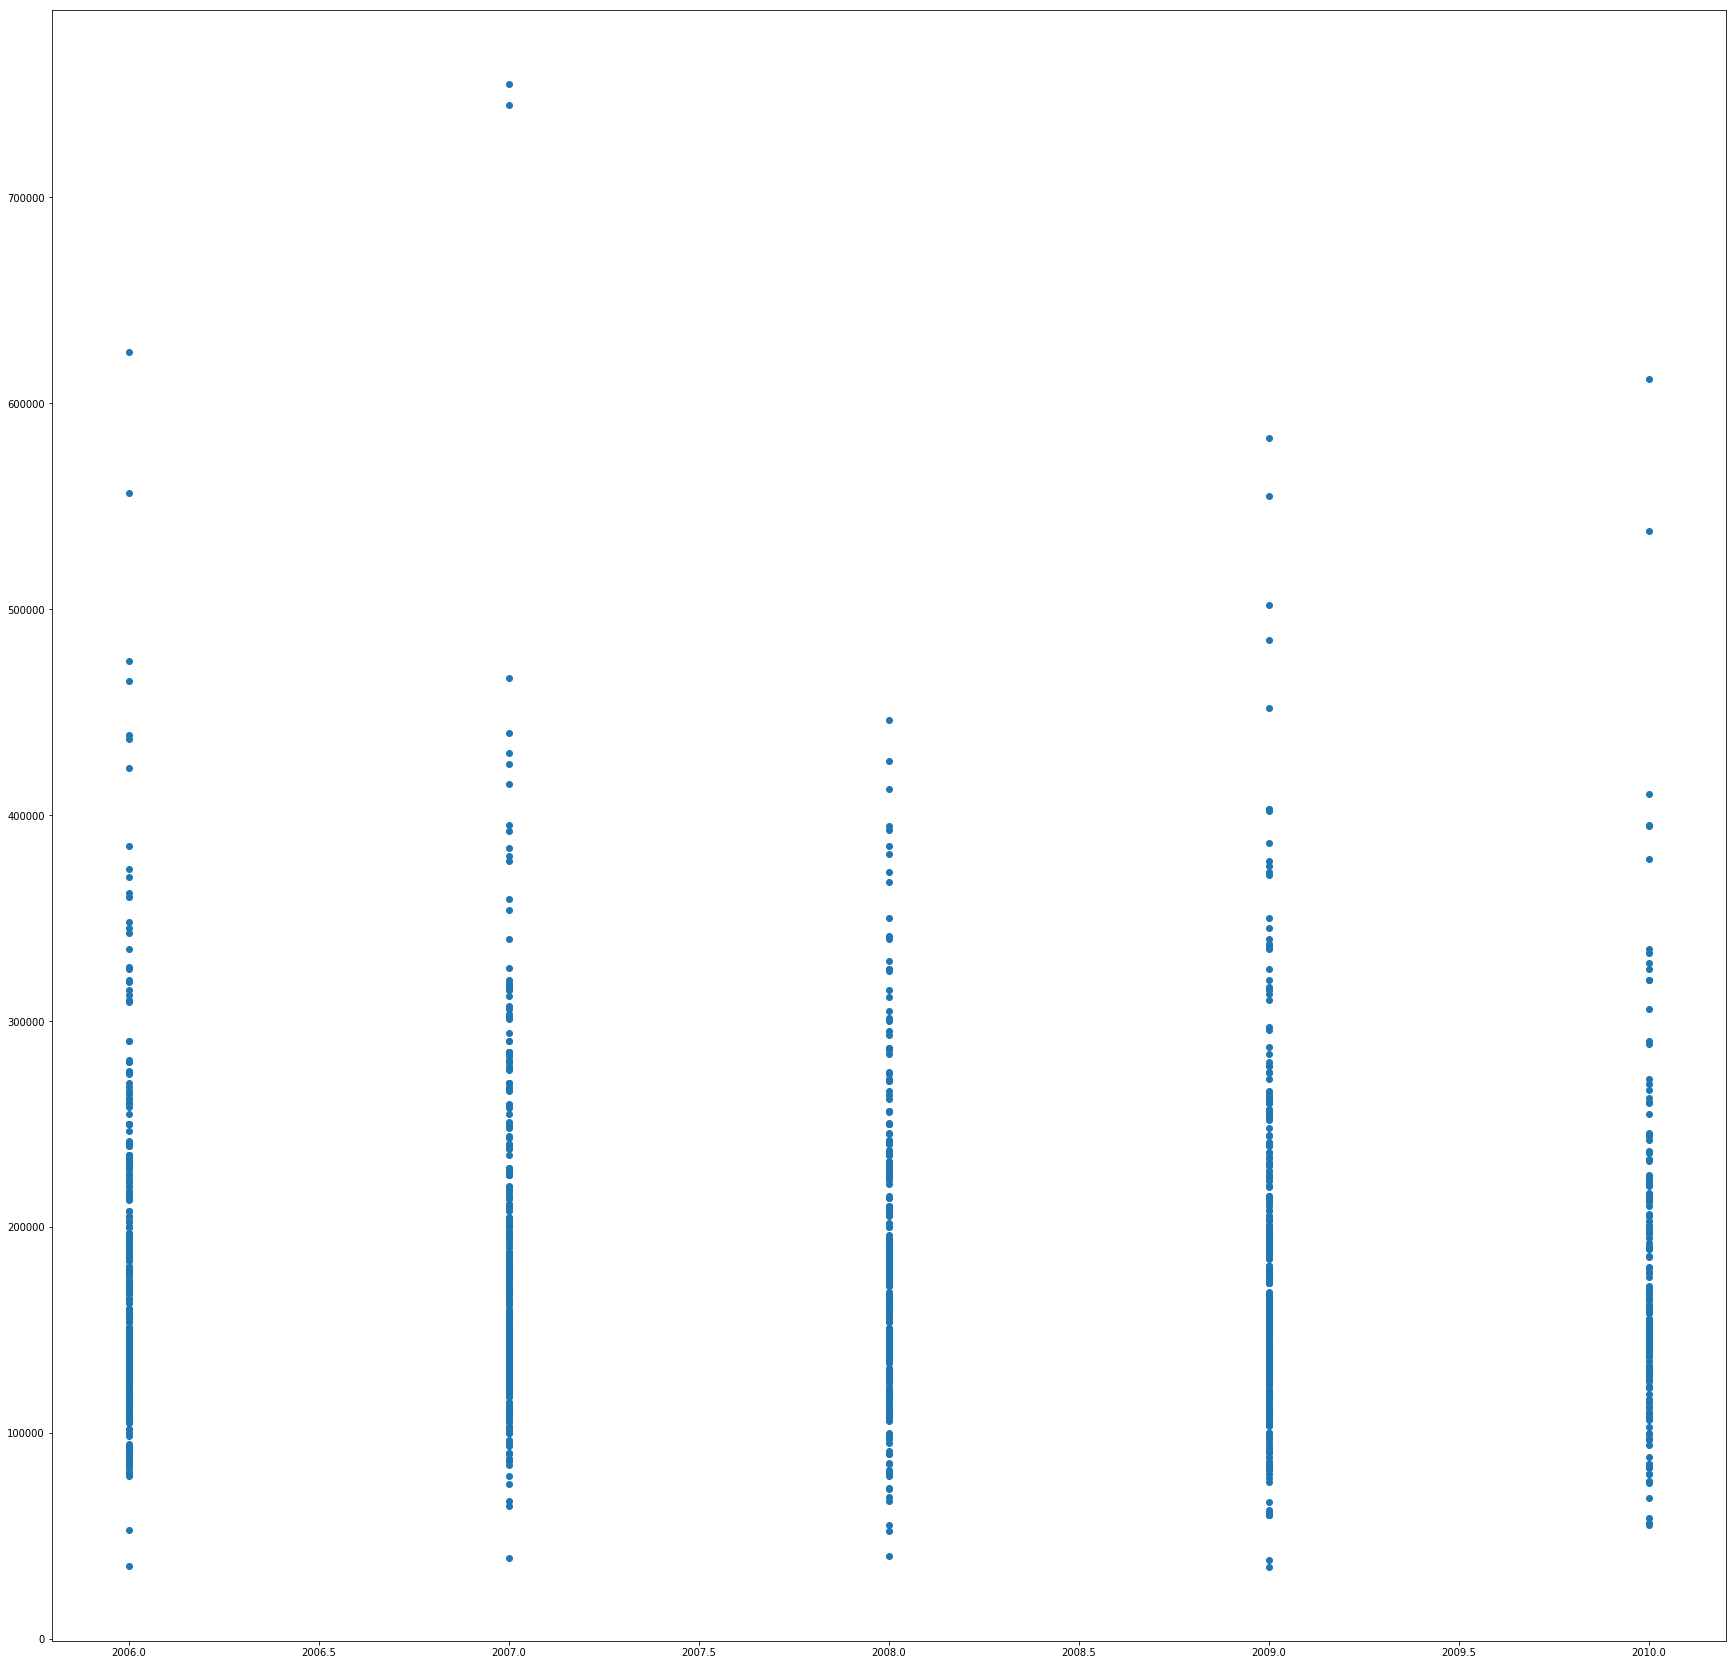

In [17]:
plt.scatter(x=df1['YrSold'],y=y_train)

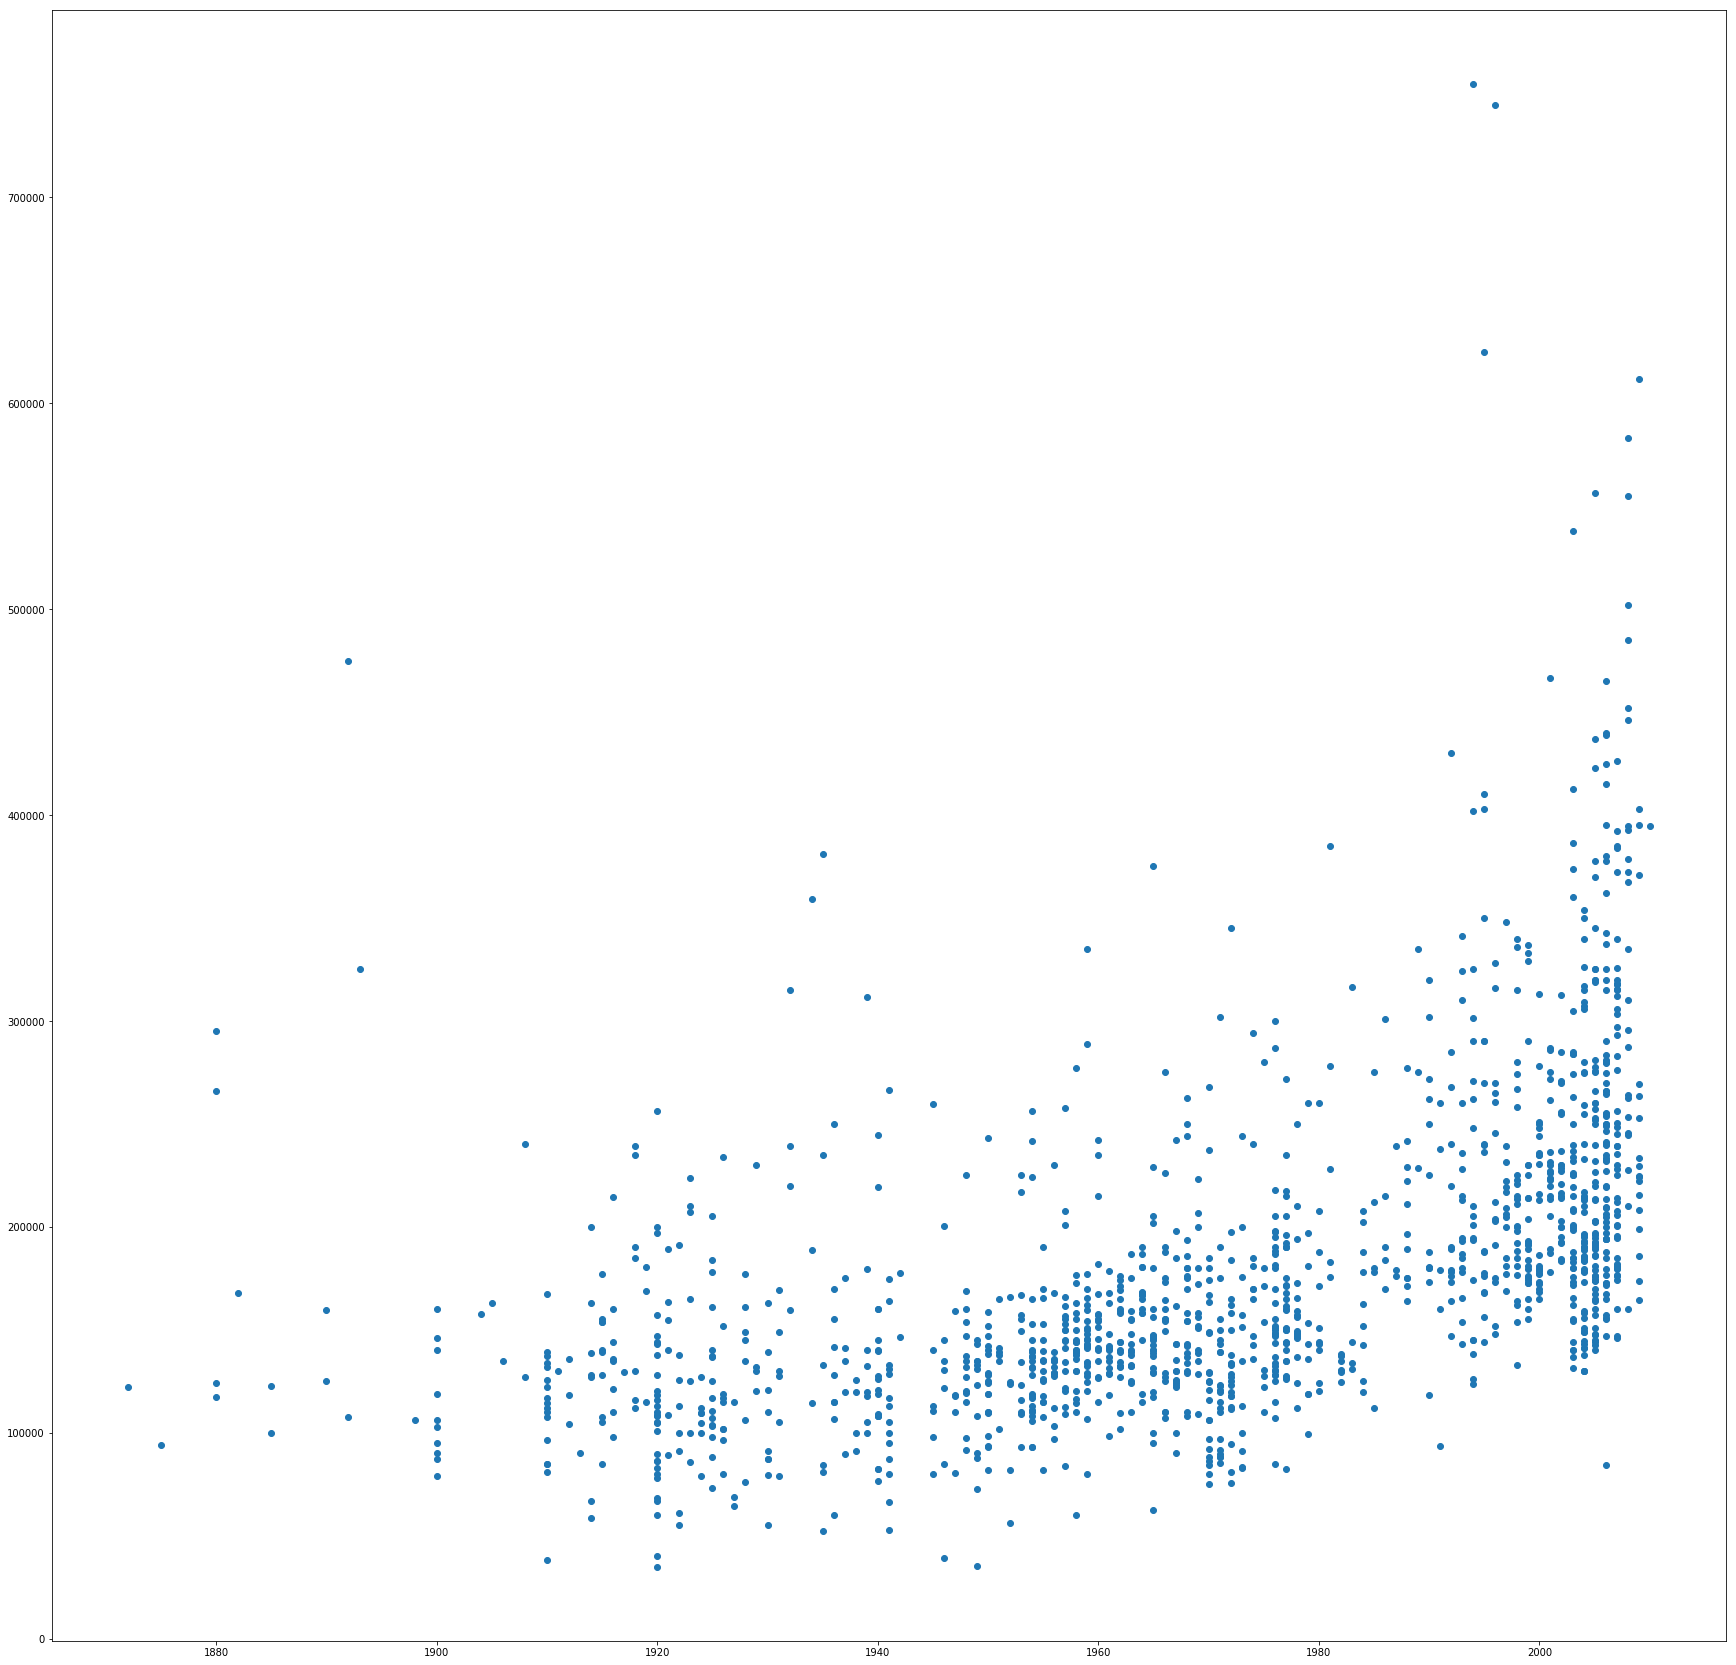

In [18]:
plt.scatter(x=df1['YearBuilt'],y=y_train)

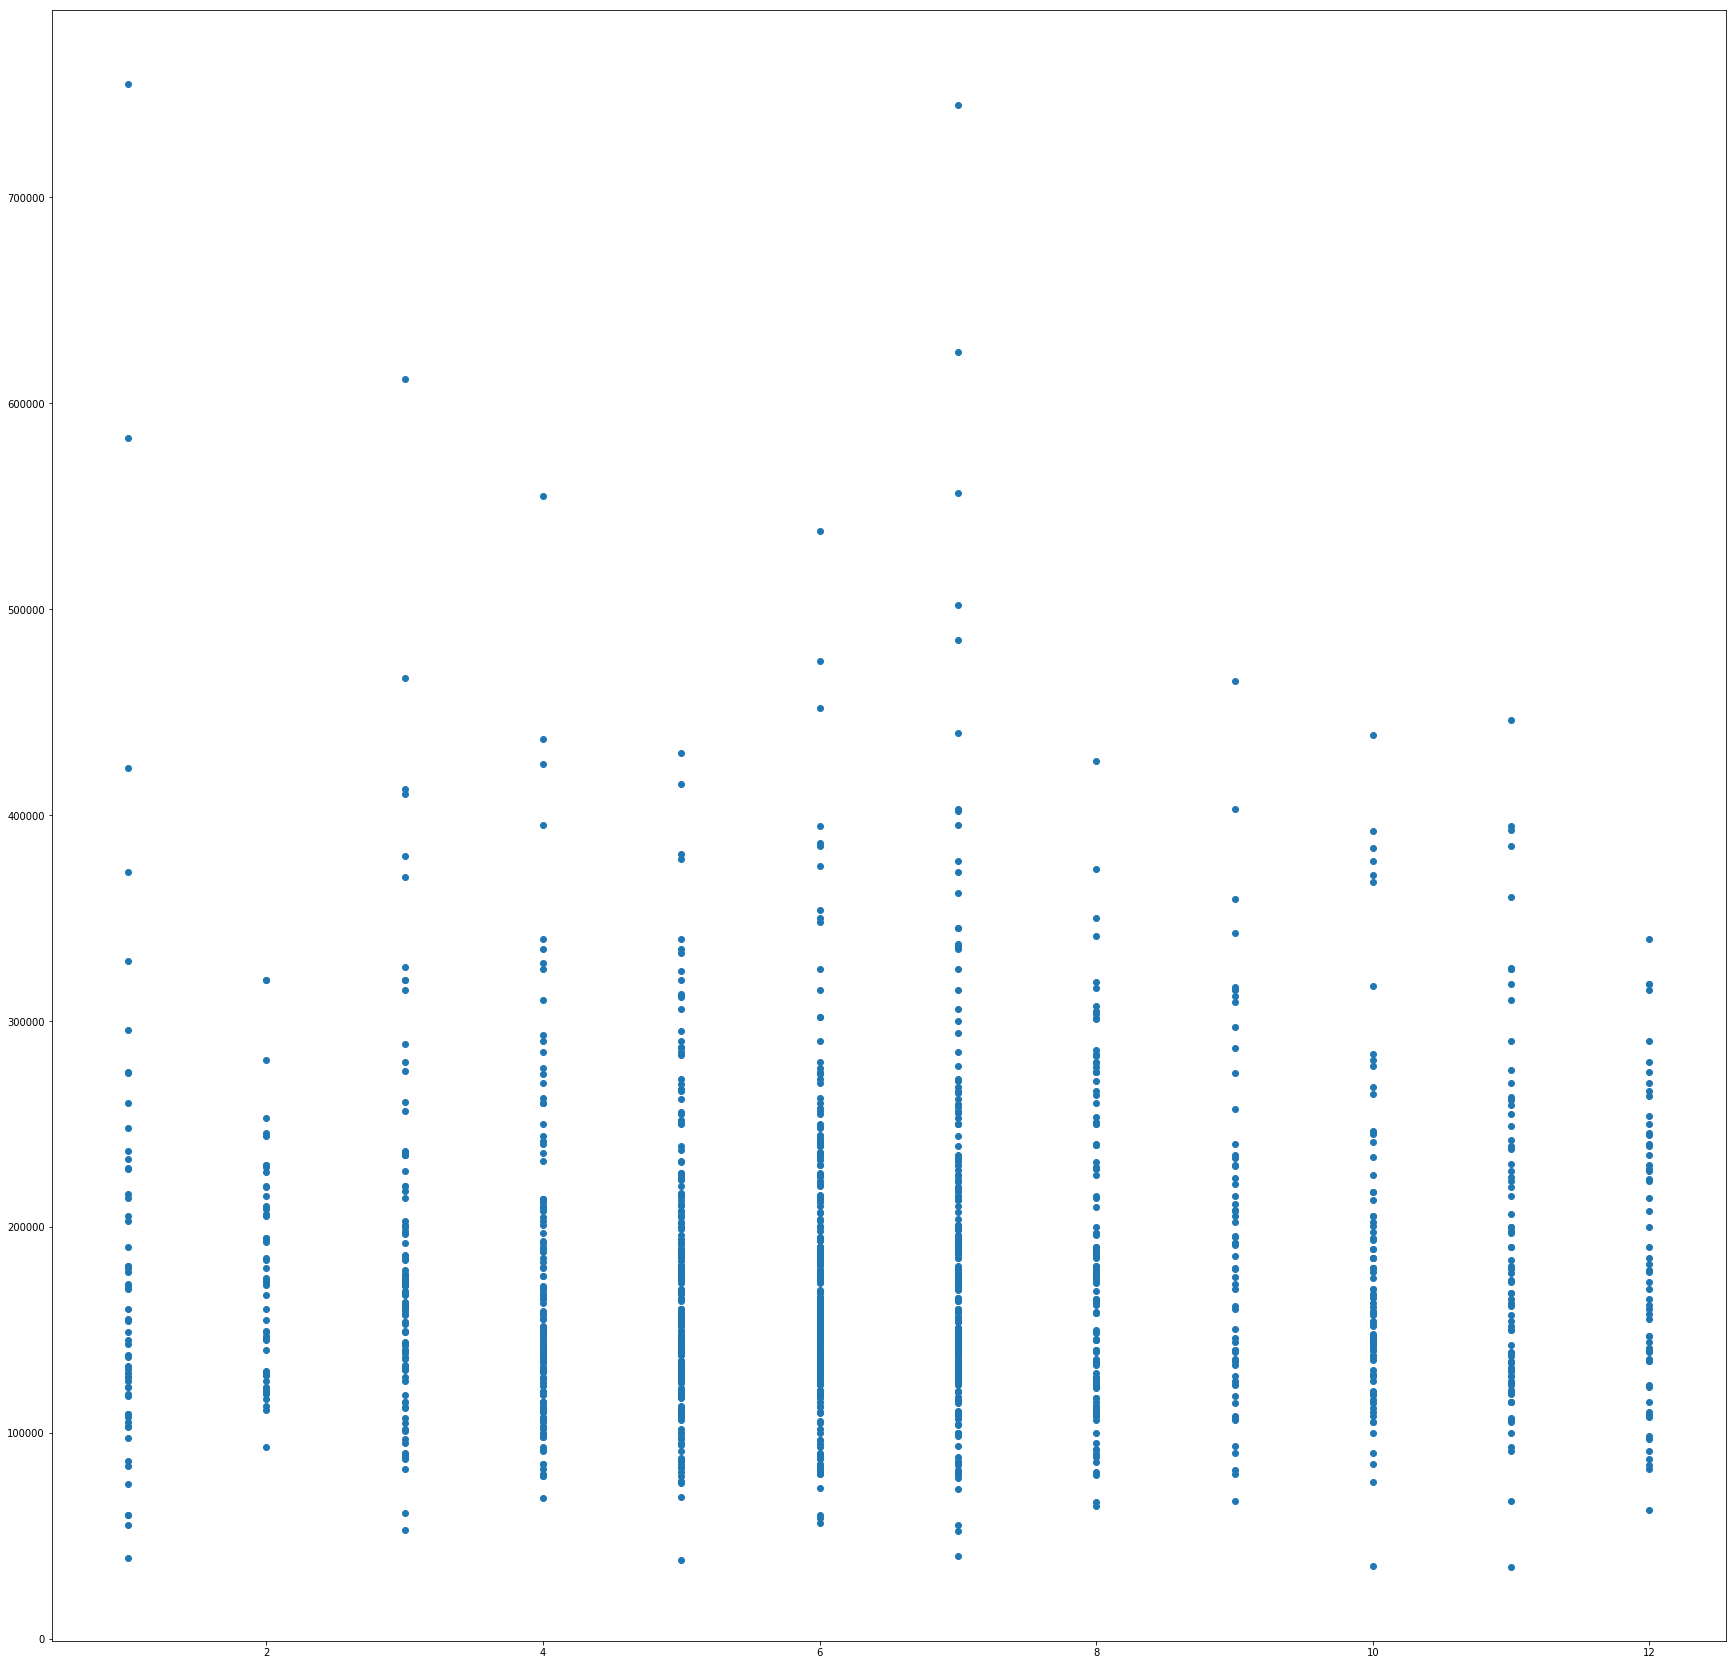

In [19]:
plt.scatter(x=df1['MoSold'],y=y_train)

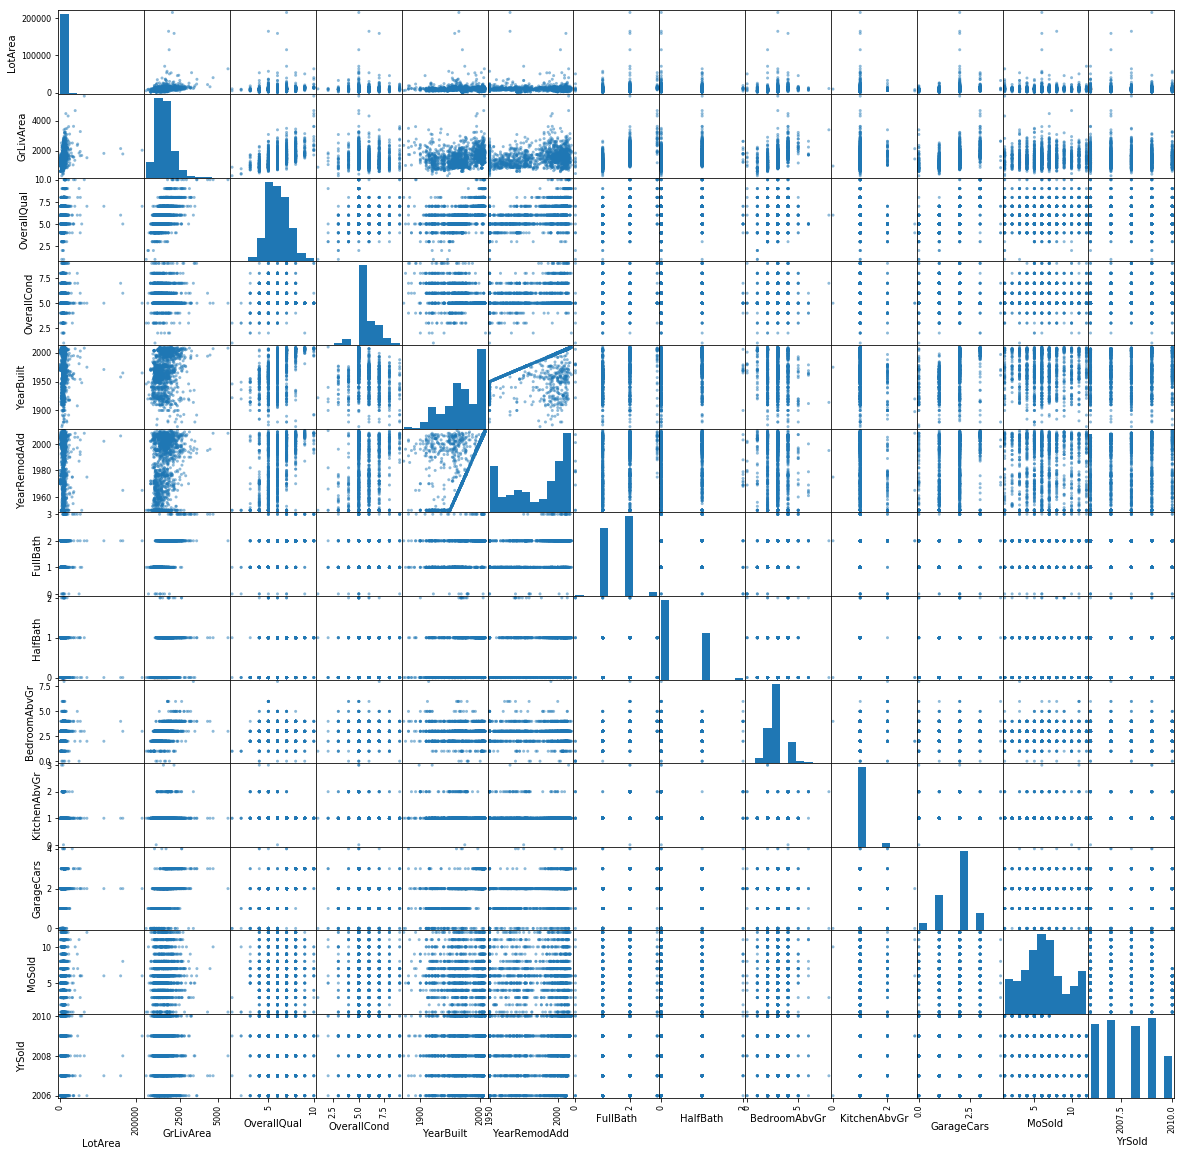

In [20]:

from pandas.plotting import scatter_matrix
plt.rcParams['figure.figsize'] = (20,20)
scatter_matrix(df1)
plt.show()

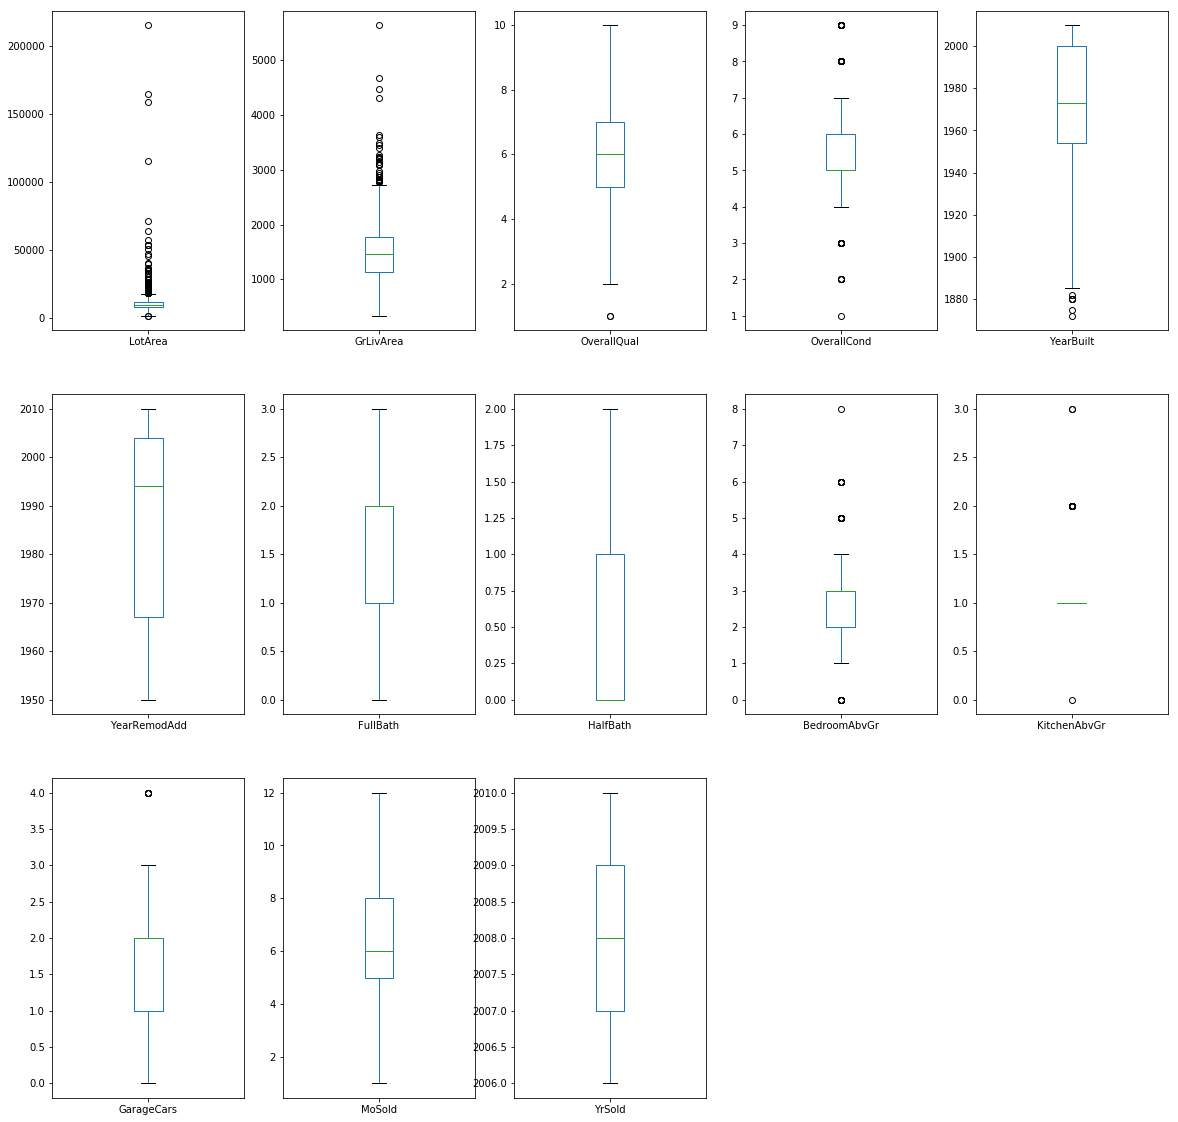

In [21]:
# box and whisker plots
df1.plot(kind='box', subplots=True, layout=(3,5), sharex=False, sharey=False)
plt.show()

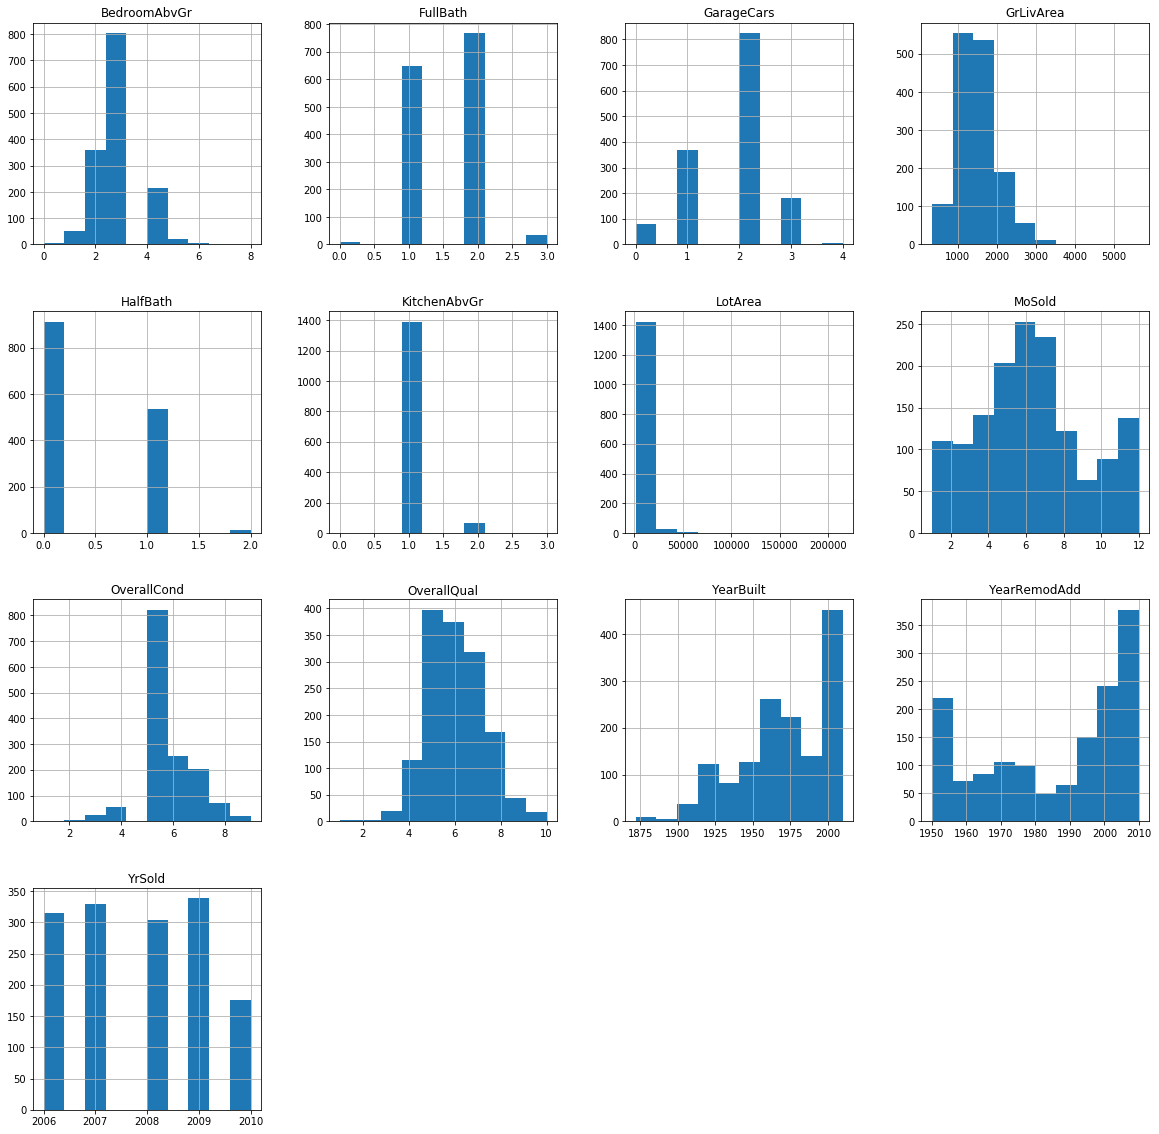

In [22]:
df1.hist()
plt.show()   #Showing Gaussian distributions: Bedrooms, GrLivArea, GarageCars, OverallQual

In [23]:
categoricals = df_train.select_dtypes(exclude=[np.number])
categoricals.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


In [24]:
df1 = pd.get_dummies(df1, drop_first=True, dummy_na=True)

In [25]:
df1.head()

,LotArea,GrLivArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,GarageCars,MoSold,YrSold,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Neighborhood_nan,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,KitchenQual_nan,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterQual_nan
0,8450,1710,7,5,2003,2003,2,1,3,1,2,2,2008,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,9600,1262,6,8,1976,1976,2,0,3,1,2,5,2007,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,11250,1786,7,5,2001,2002,2,1,3,1,2,9,2008,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,9550,1717,7,5,1915,1970,1,0,3,1,3,2,2006,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,14260,2198,8,5,2000,2000,2,1,4,1,3,12,2008,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [26]:
#Split Kaggle (training) data set into training & test sets (80/20)

seed = 0
df1_train,df1_test,dfy_train,dfy_test = train_test_split(df1,y_train,test_size=0.20,random_state=seed)

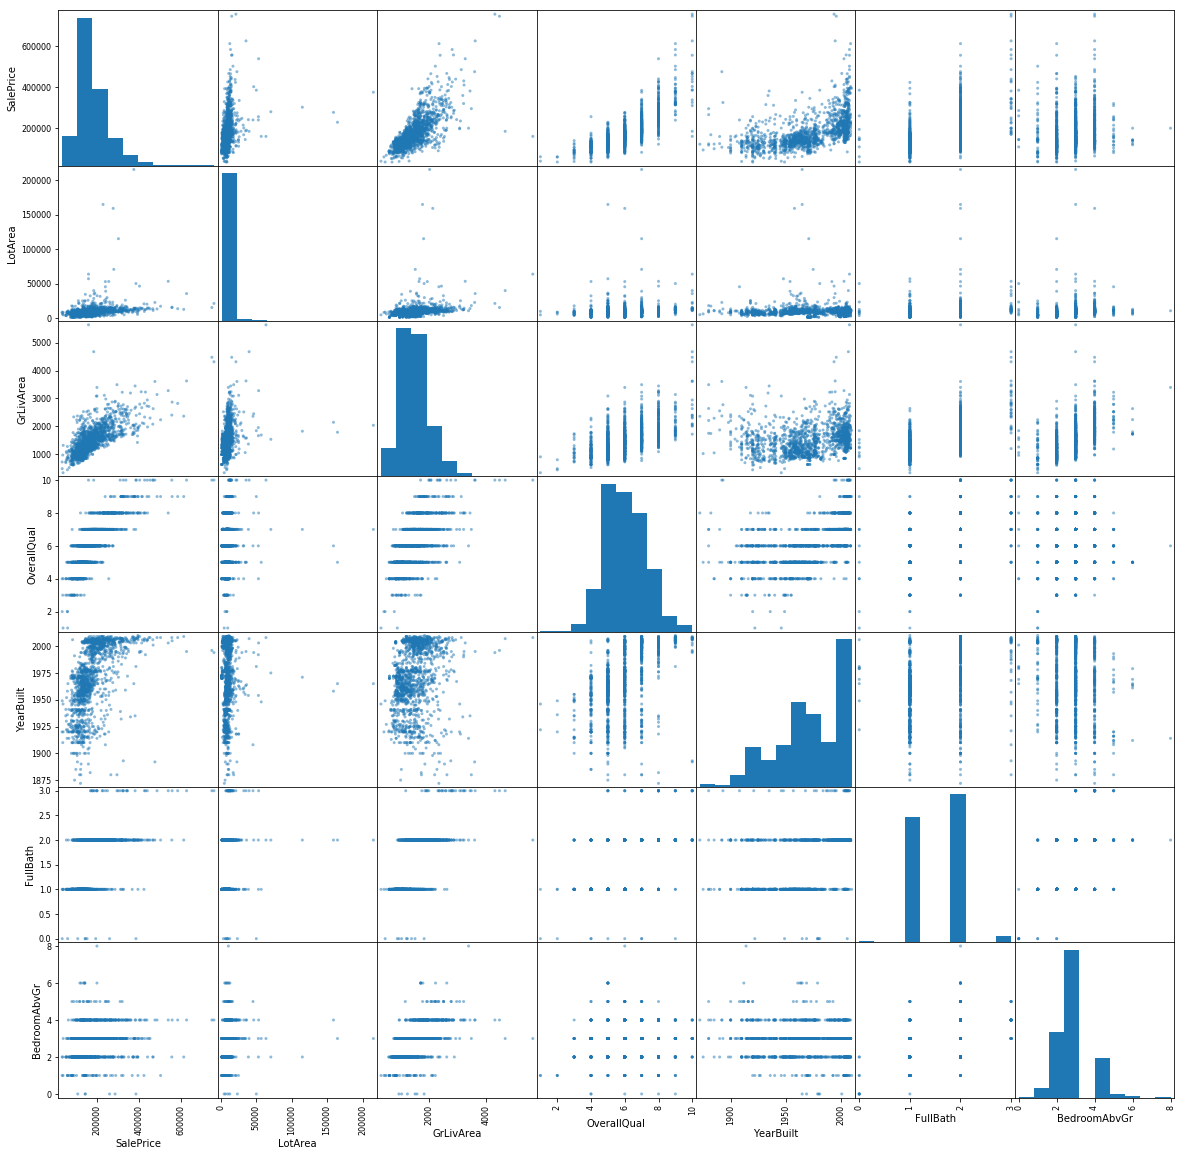

In [27]:
plt.rcParams['figure.figsize'] = (20,20)
scatter_matrix(df_train[['SalePrice','LotArea','GrLivArea','OverallQual','YearBuilt','FullBath','BedroomAbvGr']])
plt.show()

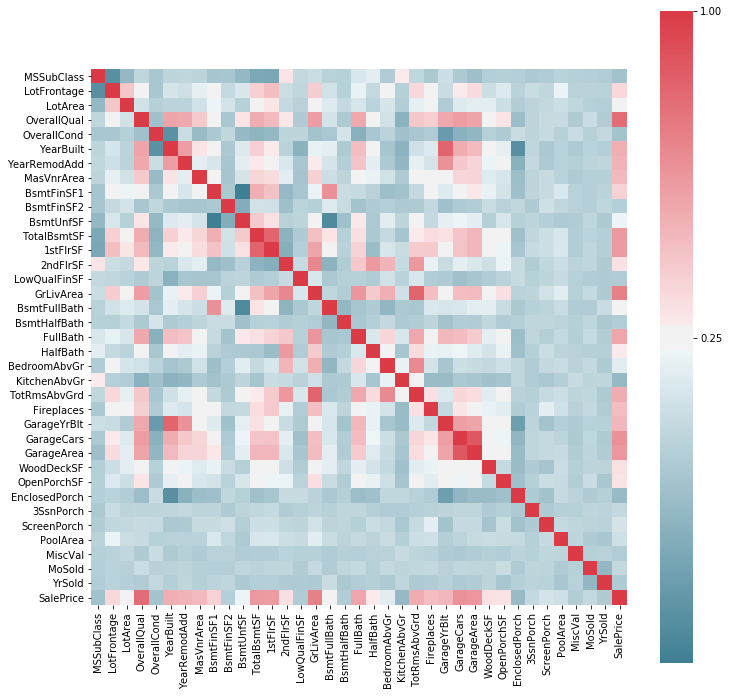

In [32]:
import seaborn as sns

cmap = sns.diverging_palette(220, 10, as_cmap=True)
corr = df_train.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:80].corr()
mask = np.zeros_like(corr)
plt.figure(figsize=(12, 12))
sns.heatmap(corr, vmax=1,cmap= cmap, square=True,cbar_kws={"ticks":[0.25,1]}, mask = mask)

In [33]:
'OverallQual', 'GrLivArea','KitchenAbvGrd','EnclosedPorch','GarageCars','FullBath', 'TotalBsmtSF','1stFlrSF'

('OverallQual',
 'GrLivArea',
 'KitchenAbvGrd',
 'EnclosedPorch',
 'GarageCars',
 'FullBath',
 'TotalBsmtSF',
 '1stFlrSF')

In [34]:
abs(corr['SalePrice'])

MSSubClass       0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond      0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2       0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF     0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath     0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch    0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal          0.021190
MoSold           0.046432
YrSold           0.028923
SalePrice        1.000000
Name: SalePrice, dtype: float64

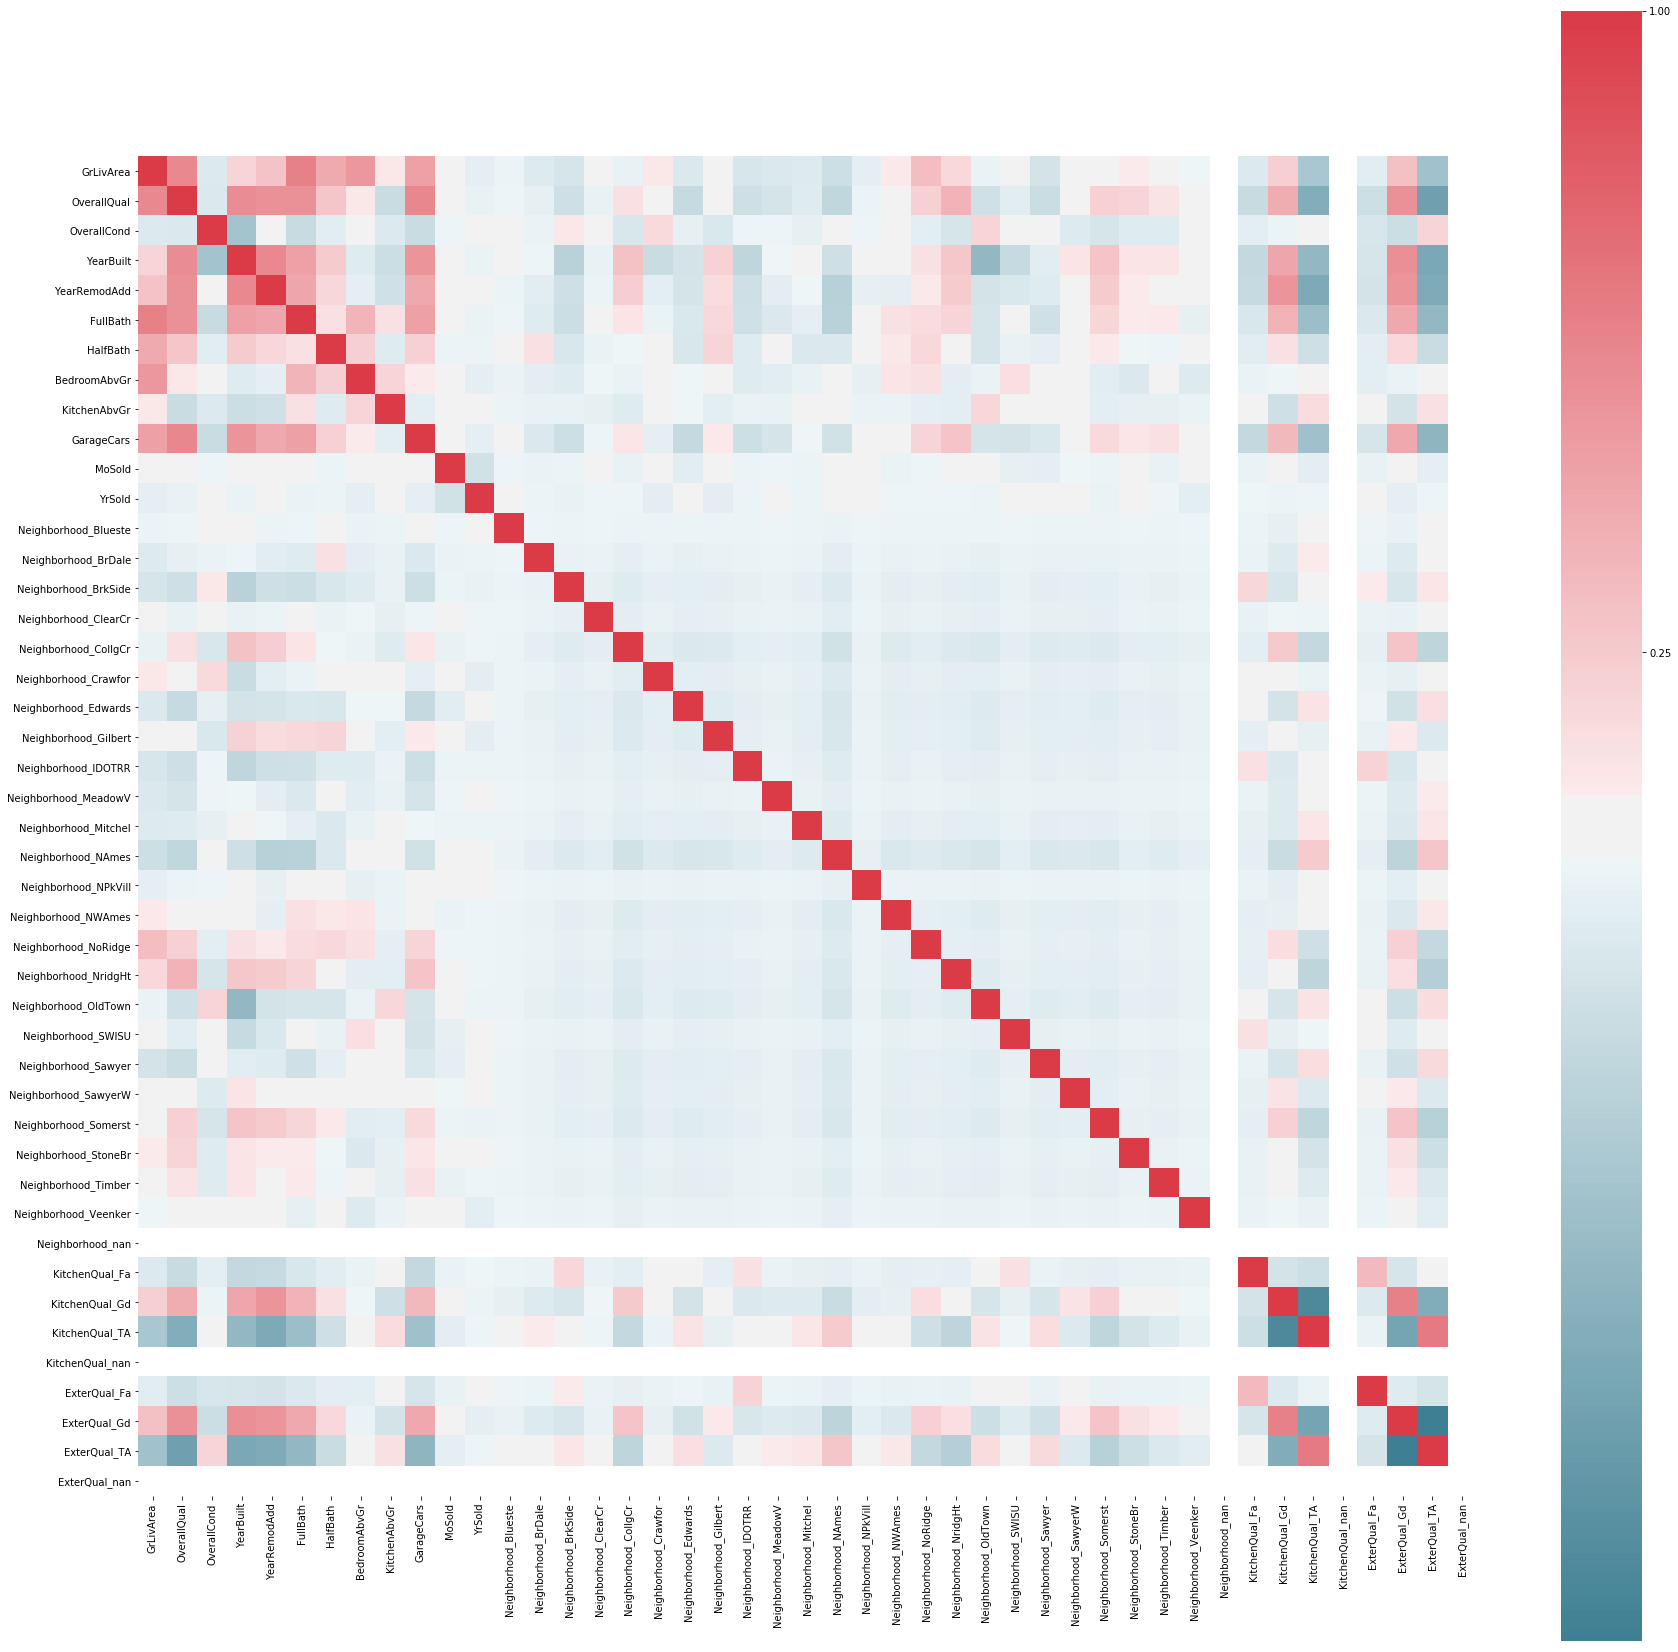

In [37]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
corr = df1.iloc[:, 1:80].corr()
mask = np.zeros_like(corr)

sns.heatmap(corr, vmax=1,cmap= cmap, square=True,cbar_kws={"ticks":[0.25,1]}, mask = mask)
plt.figure(figsize=(12, 12))

In [38]:
df_train["MoSold"] = df_train["MoSold"].astype('category')

In [39]:
dfX = pd.get_dummies(df_train, drop_first=True, dummy_na=True)

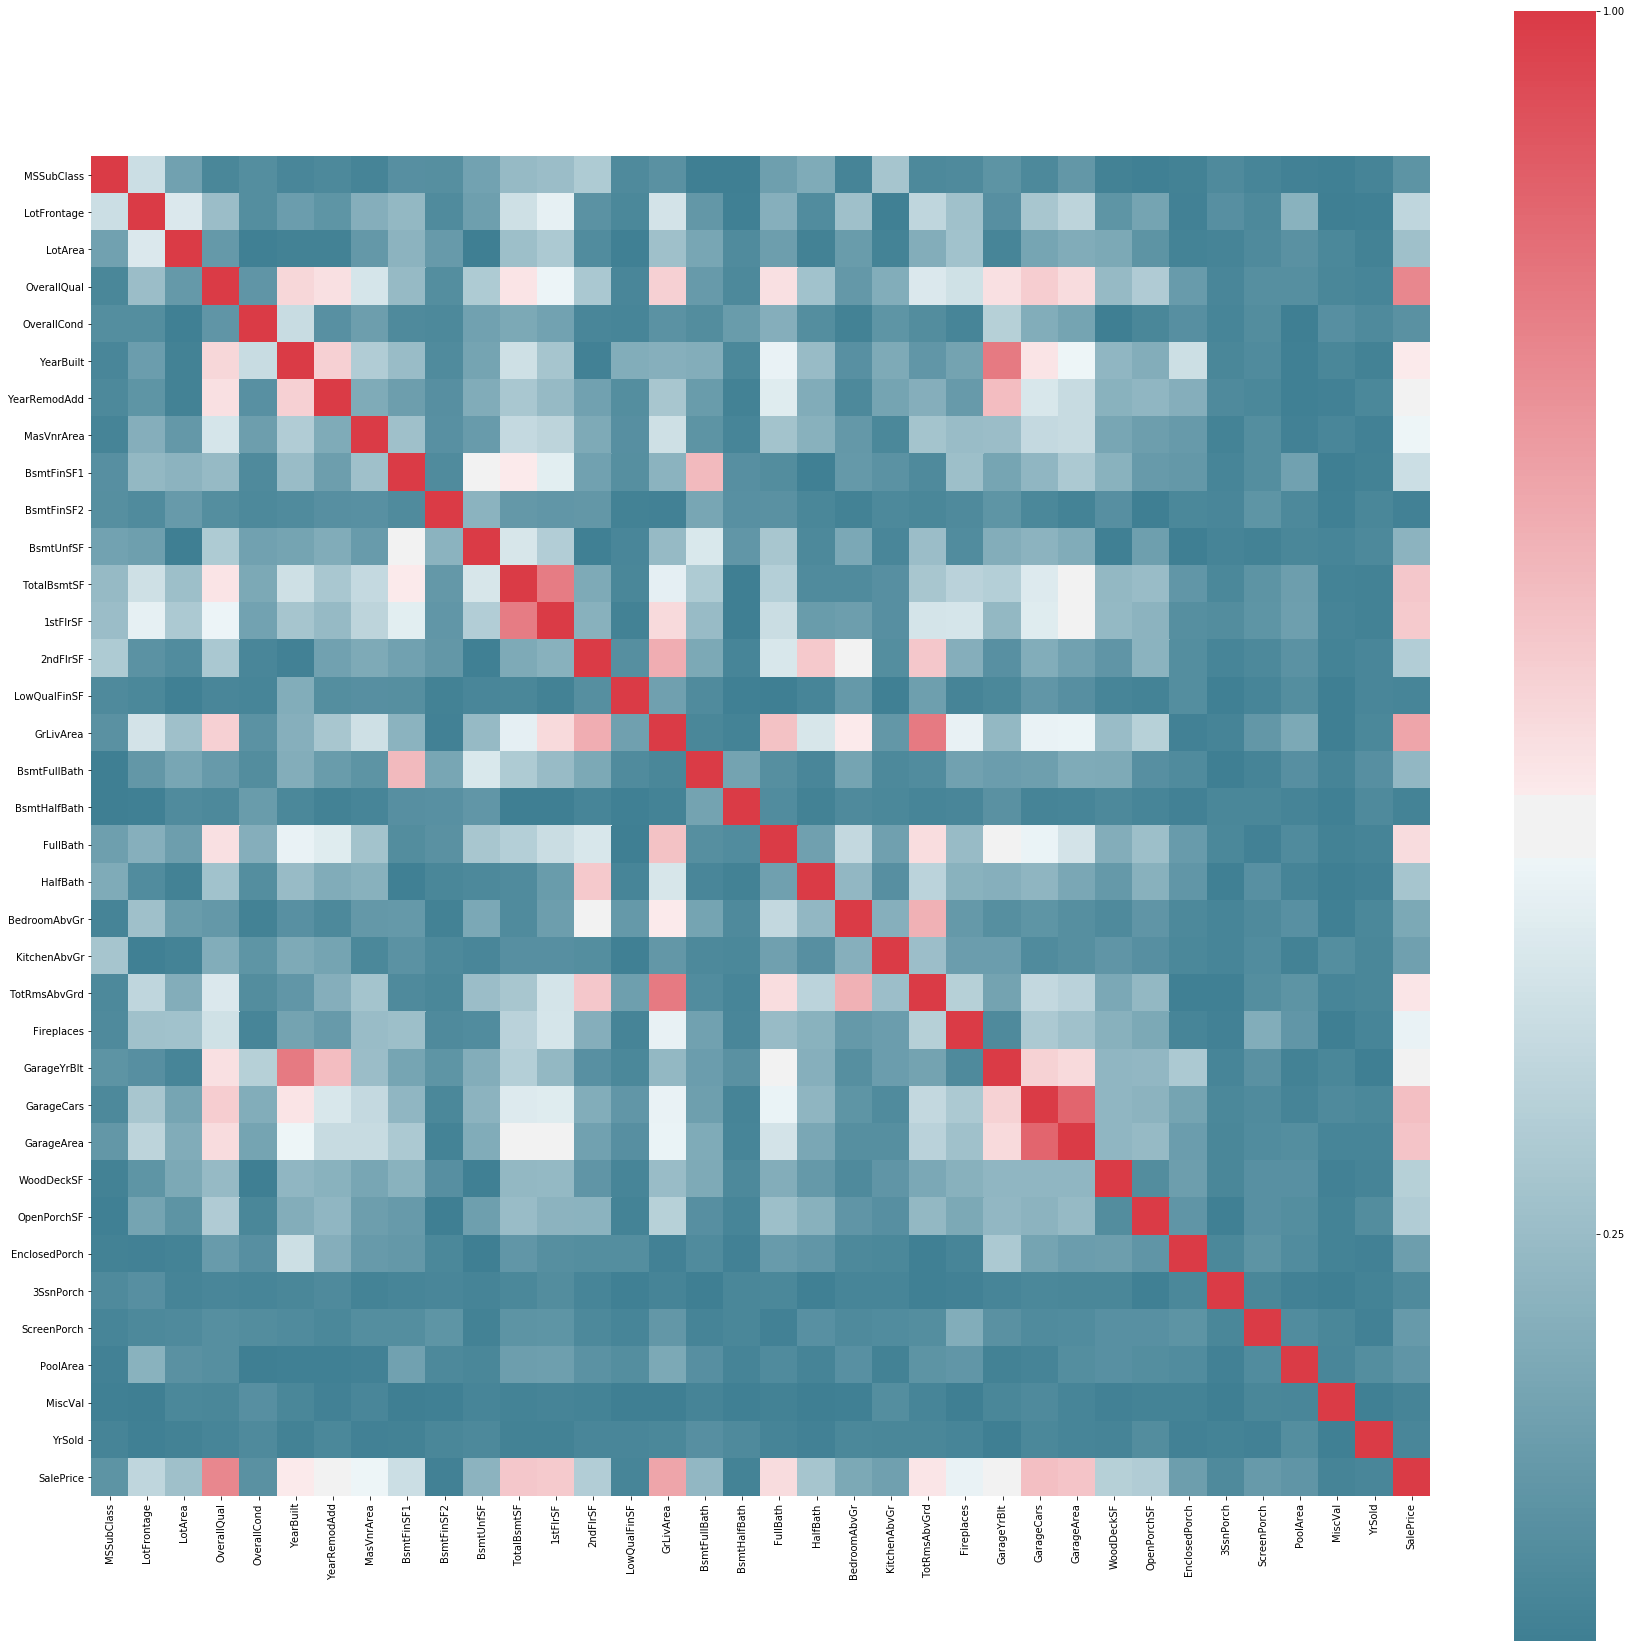

In [40]:
corr = dfX.iloc[:,1:37].corr()
mask = np.zeros_like(corr)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(abs(corr), vmax=1,cmap= cmap, square=True,cbar_kws={"ticks":[0.25,1]}, mask = mask)
plt.figure(figsize=(20, 20))

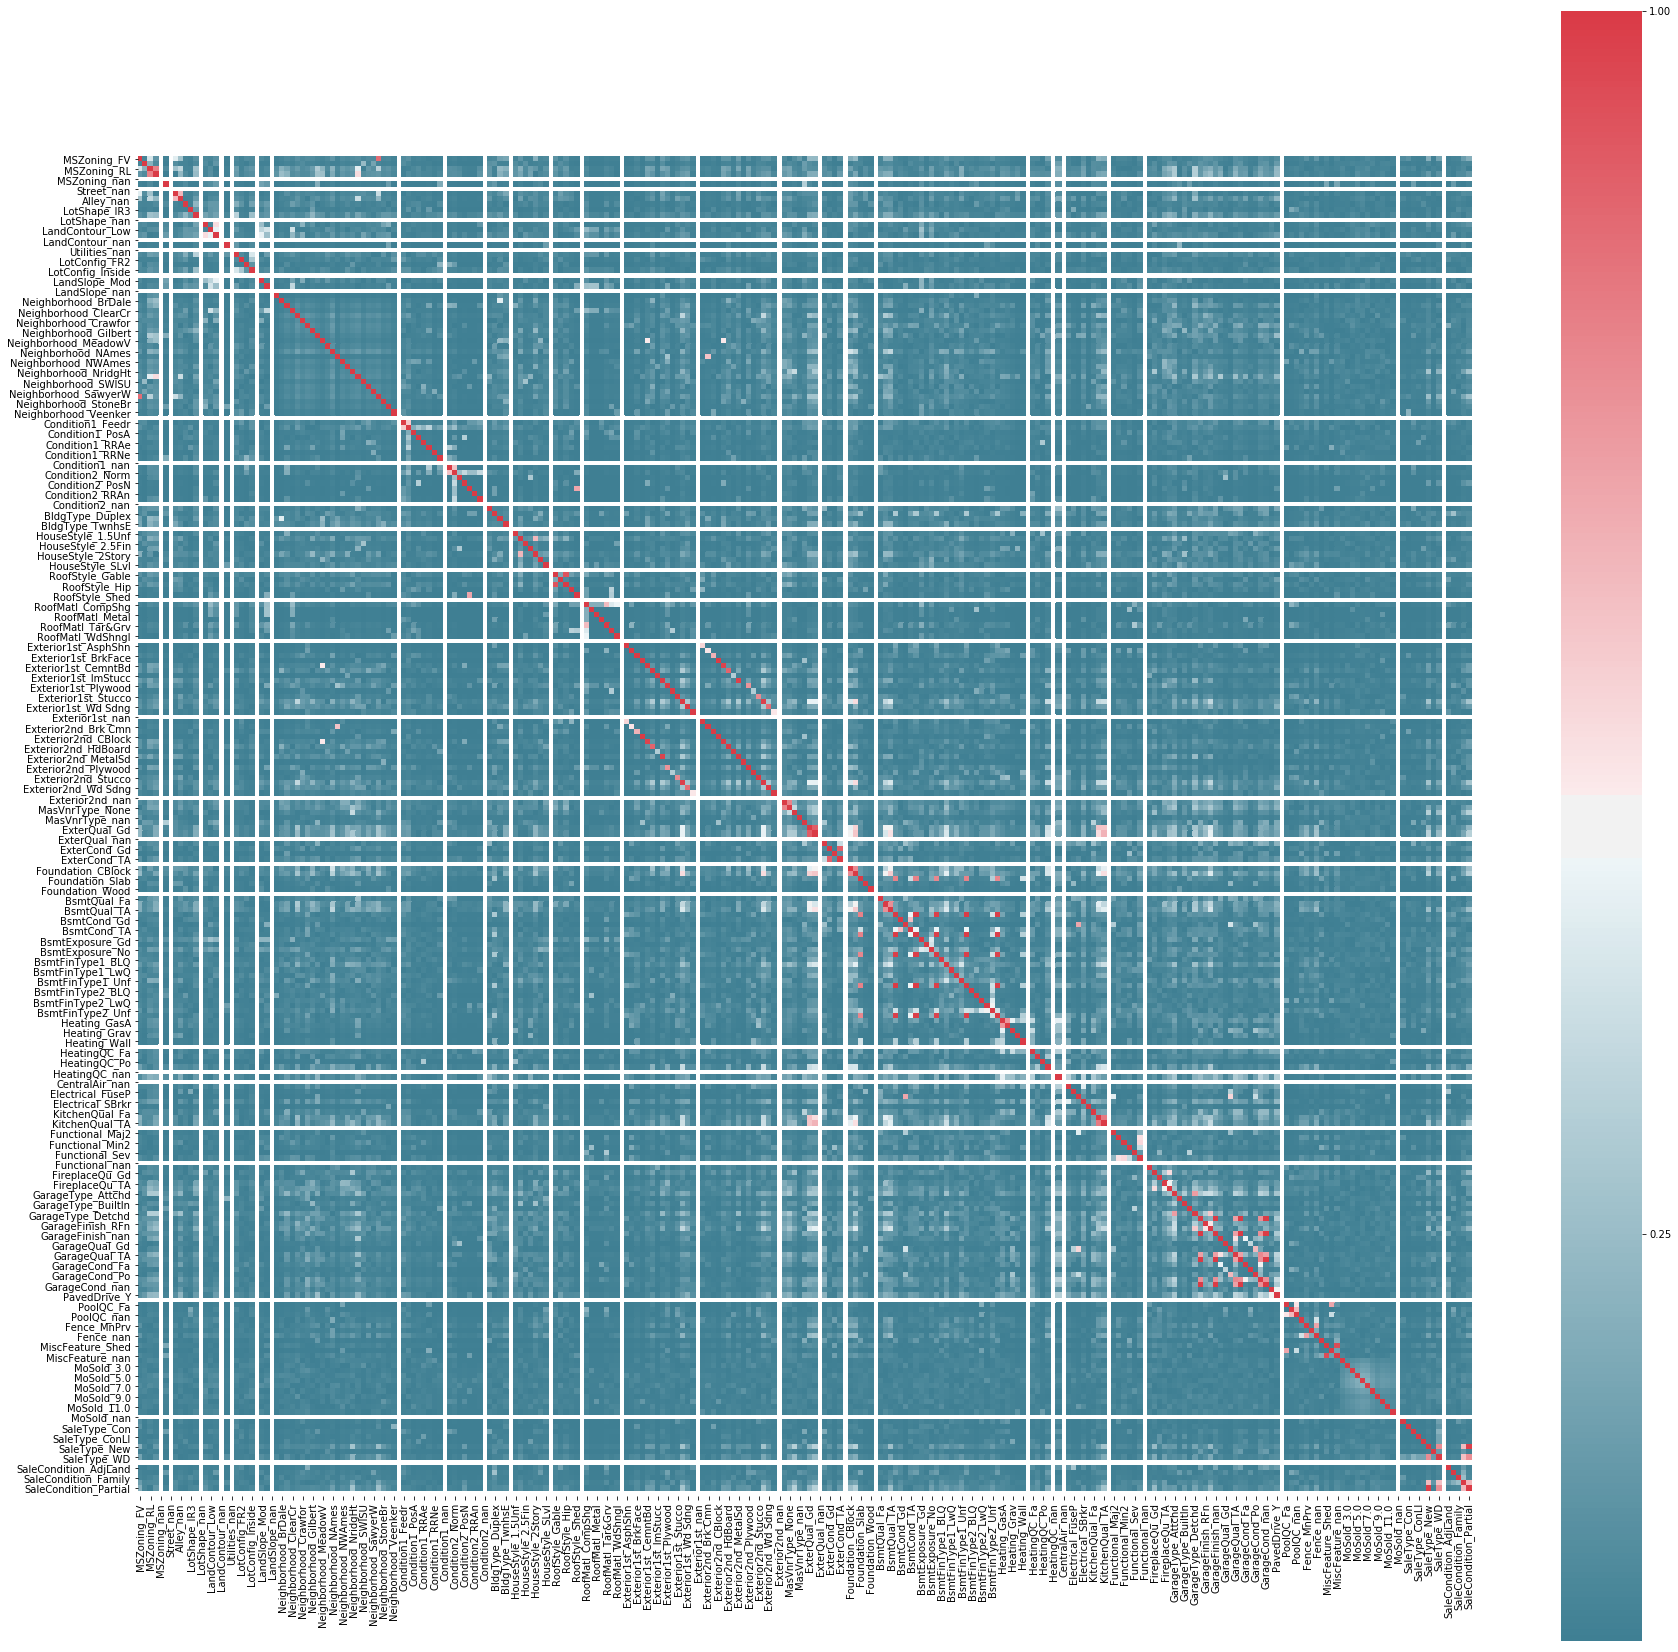

In [41]:
corr = dfX.iloc[:,37:].corr()
mask = np.zeros_like(corr)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(abs(corr), vmax=1,cmap= cmap, square=True,cbar_kws={"ticks":[0.25,1]}, mask = mask)
plt.figure(figsize=(30, 30))

In [42]:
import xgboost as xgb

In [44]:
from xgboost import XGBRegressor

my_model = XGBRegressor()
# Add silent=True to avoid printing out updates with each cycle
my_model.fit(df1, y_train, verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

[ 0.15251572  0.26415095  0.07861635  0.06603774  0.09591195  0.06918239
  0.01100629  0.00471698  0.03930818  0.01257862  0.03301887  0.03616352
  0.00471698  0.          0.          0.00157233  0.00943396  0.
  0.02044025  0.00786164  0.00786164  0.00471698  0.          0.
  0.00314465  0.          0.          0.00471698  0.01572327  0.00943396
  0.          0.          0.          0.          0.02201258  0.
  0.00943396  0.          0.00471698  0.00157233  0.00471698  0.
  0.00157233  0.          0.00314465  0.        ]


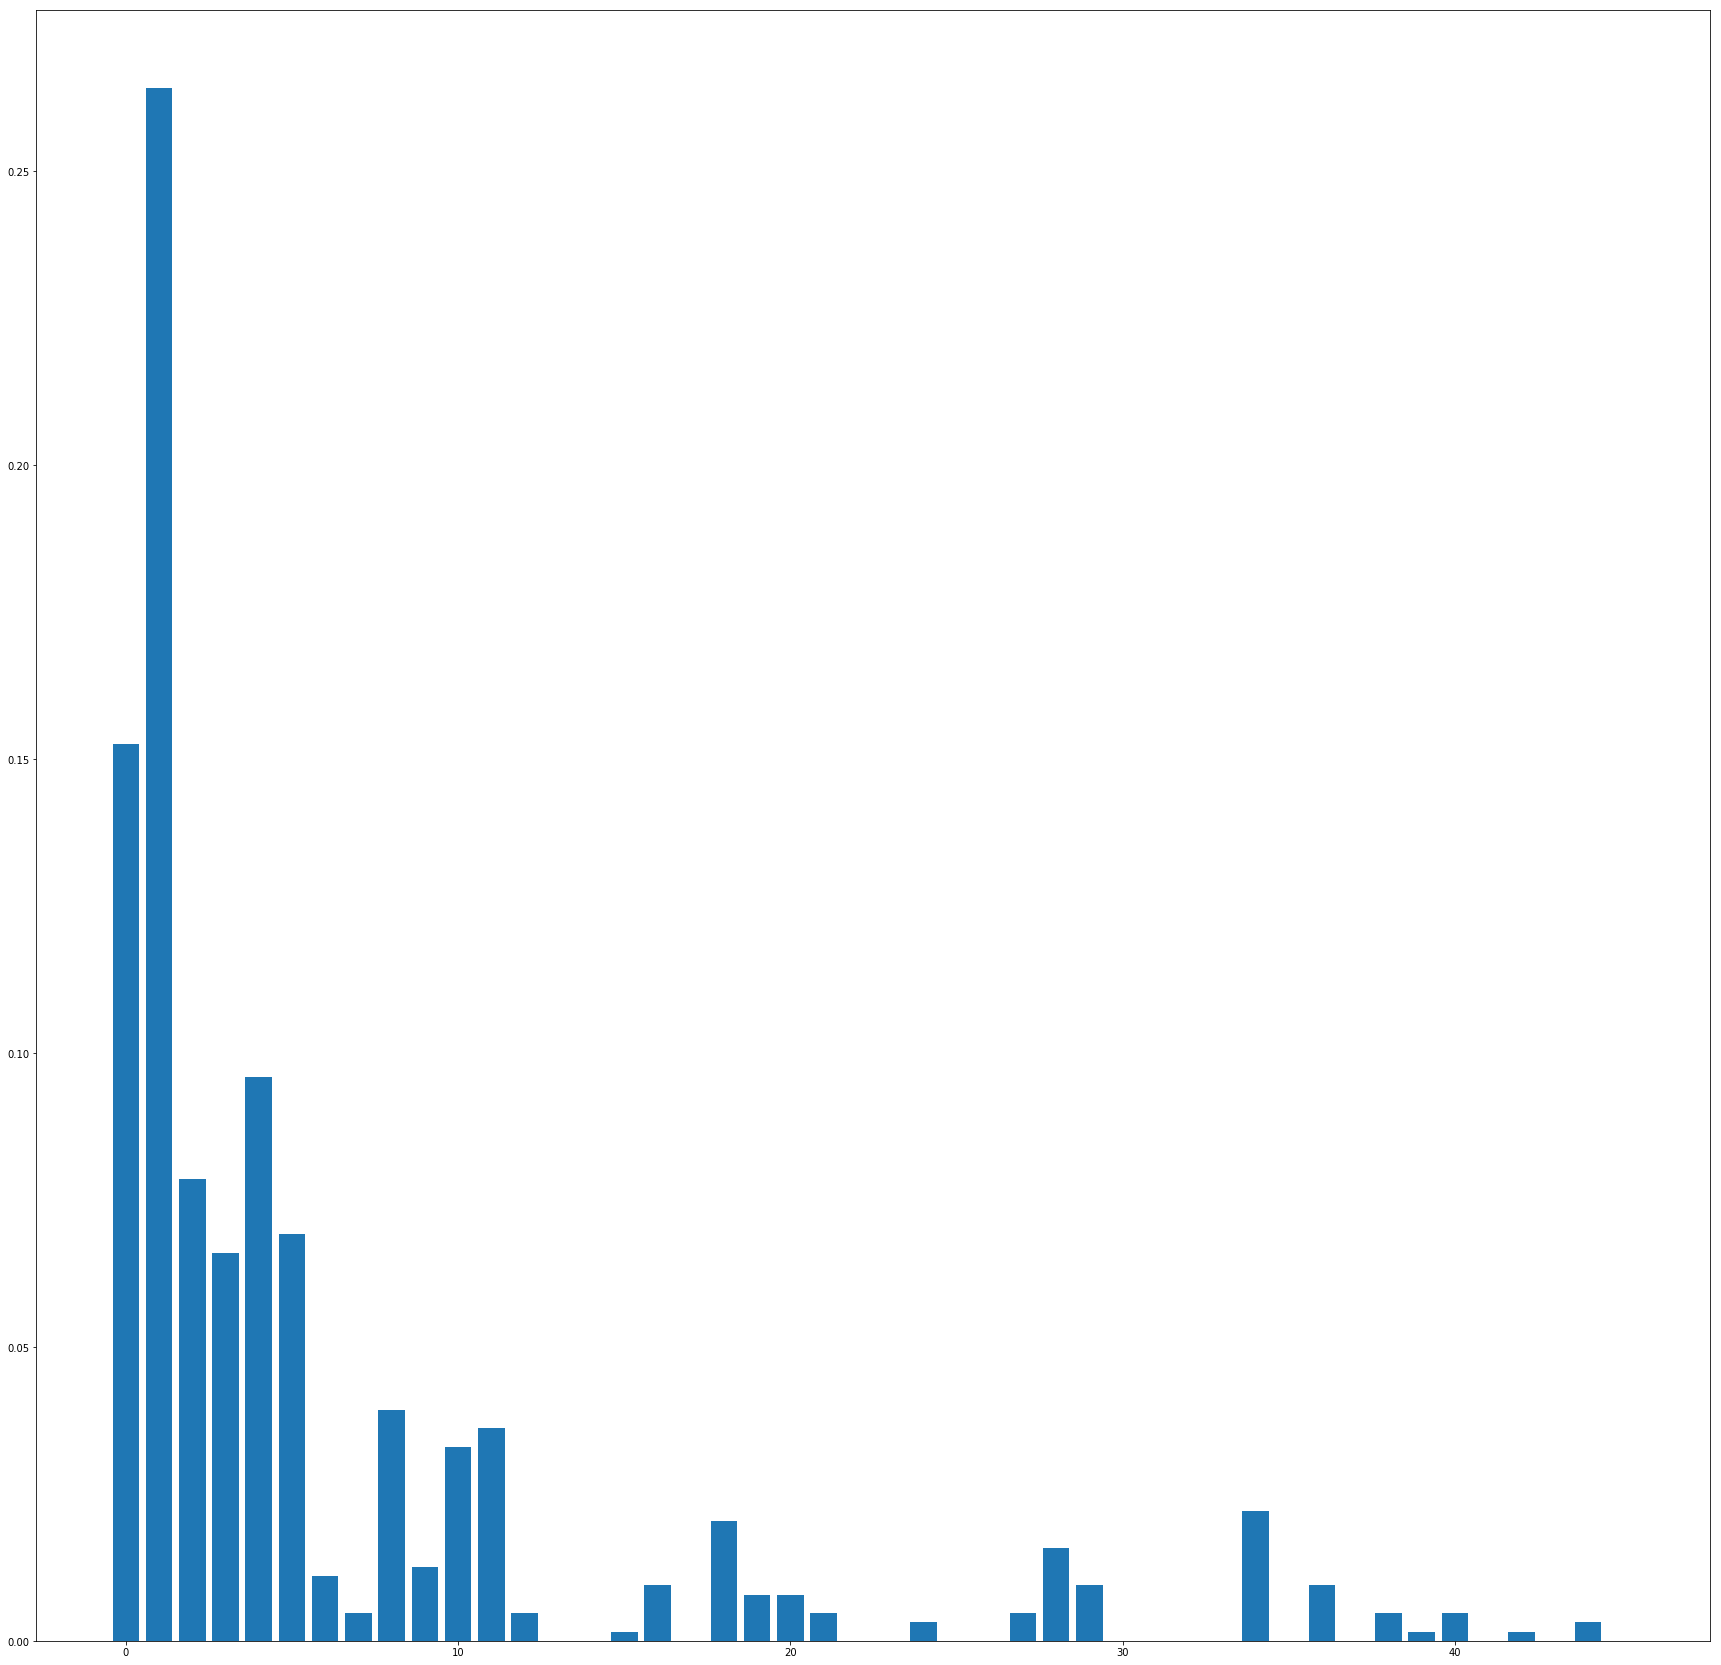

In [47]:
print(my_model.feature_importances_)

# plot
plt.bar(range(len(my_model.feature_importances_)), my_model.feature_importances_)
plt.show()

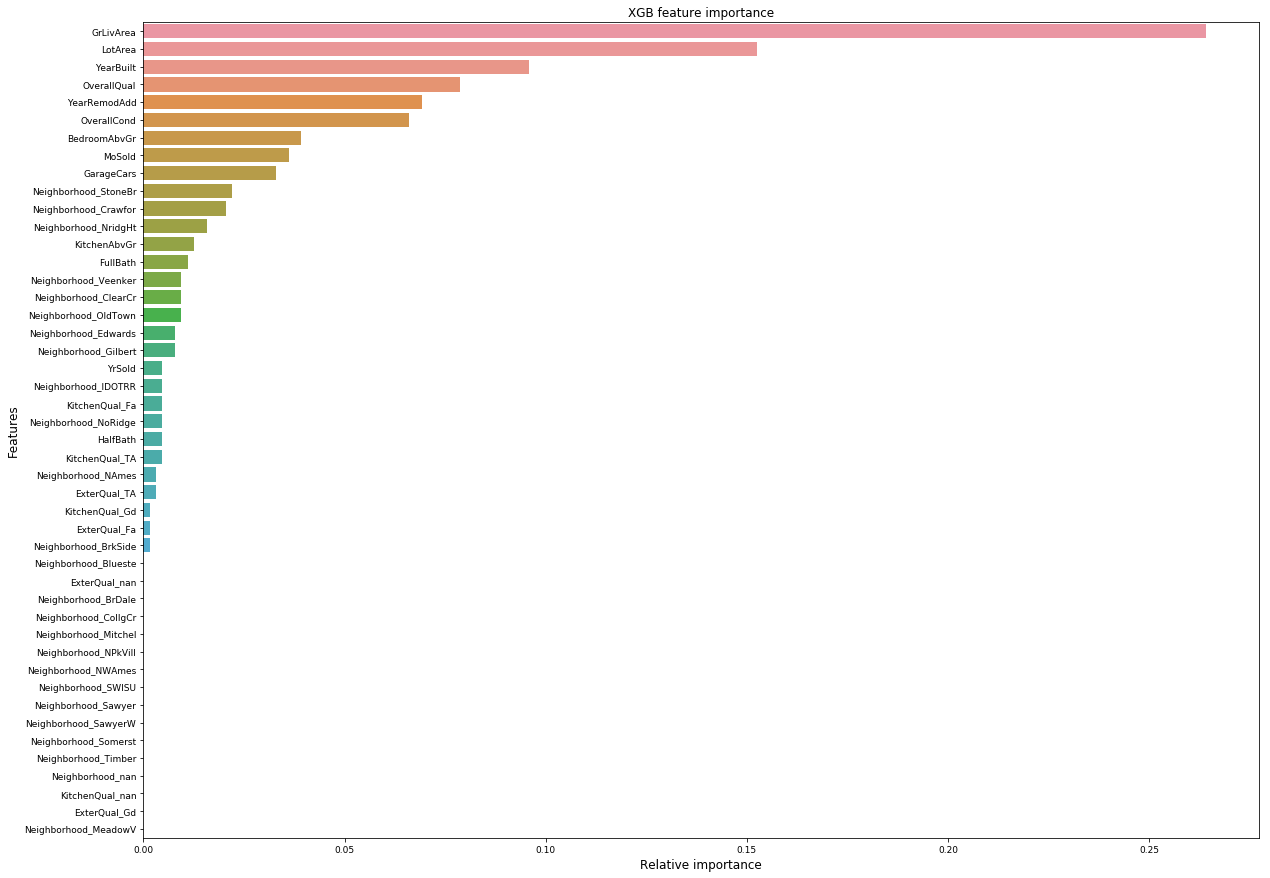

In [52]:
# Sort feature importances from GBC model trained earlier
indices = np.argsort(my_model.feature_importances_)[::-1]
indices = indices[:75]

# Visualise these with a barplot
plt.subplots(figsize=(20, 15))
g = sns.barplot(y=df1.columns[indices], x = my_model.feature_importances_[indices], orient='h')
g.set_xlabel("Relative importance",fontsize=12)
g.set_ylabel("Features",fontsize=12)
g.tick_params(labelsize=9)
g.set_title("XGB feature importance");